In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing  Essential Python Modules required during the training
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MS_Thesis/dataset/dataset.csv")
feature_names=dataset.columns

In [4]:
pd.set_option("display.max_columns",33)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Domain                   9932 non-null   object 
 1   Have_HTTPS               9932 non-null   int64  
 2   Have_At                  9932 non-null   int64  
 3   URL_Length               9932 non-null   int64  
 4   URL_Depth                9932 non-null   int64  
 5   Redirection              9932 non-null   int64  
 6   http_https_Domain        9932 non-null   int64  
 7   Prefix_Suffix            9932 non-null   int64  
 8   SubDomainCount           9932 non-null   int64  
 9   DNS_Record               9932 non-null   int64  
 10  AgeOfDomain              9932 non-null   int64  
 11  Domain_End               9932 non-null   int64  
 12  iFrame                   9932 non-null   int64  
 13  Mouse_Over               9932 non-null   int64  
 14  Right_Click             

In [6]:
dataset['Label'].value_counts()#,gen_legi['Label'].value_counts(),gen_phish['Label'].value_counts()

0    4998
1    4934
Name: Label, dtype: int64

In [7]:
pd.set_option("display.max_columns",33)
dataset.describe()

,Have_HTTPS,Have_At,URL_Length,URL_Depth,Redirection,http_https_Domain,Prefix_Suffix,SubDomainCount,DNS_Record,AgeOfDomain,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Google_Index,Favicon,CopyRightSymbol,CopyRightYear,Domain_Around_CopyRight,LinkRatio,SSL_Domain_Name,Submit_Handler,FormMail,NonStandardPort,SubPagesCount,IndexPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
count,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9.932000e+03,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000
mean,0.104913,0.009464,43.709726,0.297120,0.013794,0.000302,0.239629,0.010673,0.306786,0.487314,0.585582,0.196536,0.039871,0.040375,0.050946,0.025272,0.348973,0.737817,0.965667,0.982380,0.333401,0.865687,0.039871,0.039871,0.008659,47.966472,1.193655e+06,0.852008,0.451190,0.462172,0.087767,0.158377,0.496778
std,0.306457,0.096828,55.499778,0.912008,0.116640,0.017378,0.426879,0.102761,0.461183,0.499864,0.492646,0.397399,0.195666,0.196846,0.219899,0.156958,0.476669,0.439844,0.182093,0.131572,0.458660,0.341006,0.195666,0.195666,0.092654,226.372655,4.791386e+07,0.303886,0.413385,0.475500,0.245187,0.365112,0.500015
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.916667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.016129,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.364362,0.184243,0.000000,0.000000,0.000000
75%,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,0.000000e+00,1.000000,0.990000,1.000000,0.017699,0.000000,1.000000
max,1.000000,1.000000,822.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6370.000000,4.420000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# #Train-Test split
# from sklearn.model_selection import StratifiedShuffleSplit
# split_data=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=93) #change here
# for train_index,test_index in split_data.split(dataset,dataset['Label']):
#     strat_train_set=dataset.loc[train_index]
#     strat_test_set=dataset.loc[test_index]

In [9]:
# strat_test_set['Label'].value_counts(),strat_train_set['Label'].value_counts()

In [10]:
# dataset = strat_train_set

In [11]:
dataset

,Domain,Have_HTTPS,Have_At,URL_Length,URL_Depth,Redirection,http_https_Domain,Prefix_Suffix,SubDomainCount,DNS_Record,AgeOfDomain,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,...,CopyRightSymbol,CopyRightYear,Domain_Around_CopyRight,LinkRatio,SSL_Domain_Name,Submit_Handler,FormMail,NonStandardPort,SubPagesCount,IndexPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
0,https://appimage.github.io,0,0,26,0,0,0,0,0,0,1,1,0,0,0,0,...,1,1,1,0.125000,1,0,0,0,18,1340,0.875,0.166667,0.764706,0.000000,0,0
1,https://twixlmedia.com,0,0,22,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0.090909,1,0,0,0,14,2150,0.000,0.363636,0.000000,0.000000,0,0
2,https://naesdezines.blogspot.com,0,0,32,0,0,0,0,0,1,1,1,1,0,0,0,...,0,1,1,0.005236,1,0,0,0,156,6,1.000,0.549738,0.722222,0.214660,1,0
3,https://castanimex.blogspot.com,0,0,31,0,0,0,0,0,1,1,1,1,0,0,0,...,1,1,1,0.014706,1,0,0,0,68,131,1.000,0.529412,0.945946,0.073529,1,0
4,https://talktoind.wordpress.com,0,0,31,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0.047170,1,0,0,0,41,128,1.000,0.160377,1.000000,0.028302,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,https://violation-management-a6bc6.web.app/,0,0,43,0,0,0,1,0,0,1,1,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1
9928,https://salonandspaindia.com/.well-known/index...,0,0,51,2,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1
9929,http://zpr.io/qzsEq4PmzLex,1,0,26,1,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1
9930,https://ffnnbb_js_loader.rukkibospa5287.worker...,0,0,52,0,0,0,0,0,0,1,1,0,0,0,0,...,1,1,1,1.000000,1,0,0,0,0,0,1.000,0.000000,0.000000,0.000000,0,1


In [12]:
# X_train = strat_train_set['Domain']
# X_test = strat_test_set['Domain']
# y_train = strat_train_set['Label']
# y_test = strat_test_set['Label']

In [13]:
# X_train, X_val, y_train, y_val = train_test_split(dataset, dataset['Label'], test_size=0.1, random_state=2, stratify=dataset['Label'])

In [14]:
# y_train.value_counts(), y_val.value_counts(),

#NN

In [15]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Flatten, Dense
# from sklearn.model_selection import train_test_split
# from keras.optimizers import Adam

# # # Sample text data and labels
# # texts = ["This is a positive text.", "This is a negative text.", "Another positive example.", "Another negative example."]
# # labels = [1, 0, 1, 0]

# X_train = strat_train_set['Domain']
# X_test = strat_test_set['Domain']
# y_train = strat_train_set['Label']
# y_test = strat_test_set['Label']

# # Tokenize and preprocess text data
# max_words = 1000  # Maximum number of words to consider
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_train)

# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# max_seq_length = 100  # Maximum sequence length
# X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
# X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)


# # Build the neural network model
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_seq_length))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test),  batch_size=32)

# # Get the training loss
# loss, accuracy = model.evaluate(X_train_pad, y_train)
# print(f"Training Error: {loss}")

# # Get the test loss
# loss, accuracy = model.evaluate(X_test_pad, y_test)
# print(f"Test Error: {loss}")

# # Make predictions
# predictions = model.predict(X_test_pad)

# from sklearn.metrics import classification_report

# # Convert the predicted probabilities to binary labels
# predicted_labels = np.round(predictions).astype(int)

# # Generate the classification report
# report = classification_report(y_test, predicted_labels, digits = 4)

# # Print the classification report
# print(report)

# # Plot training and testing loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#CNN

In [16]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
# from keras.optimizers import Adam

# # Tokenize and preprocess text data
# max_words = 1000  # Maximum number of words to consider
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_train)

# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# max_seq_length = 100  # Maximum sequence length
# X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
# X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

# # Build a 1D CNN model
# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_seq_length))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test),  batch_size=32)

# # Get the training loss
# loss, accuracy = model.evaluate(X_train_pad, y_train)
# print(f"Training Error: {loss}")

# # Get the test loss
# loss, accuracy = model.evaluate(X_test_pad, y_test)
# print(f"Test Error: {loss}")

# # Make predictions
# predictions = model.predict(X_test_pad)

# from sklearn.metrics import classification_report

# # Convert the predicted probabilities to binary labels
# predicted_labels = np.round(predictions).astype(int)

# # Generate the classification report
# report = classification_report(y_test, predicted_labels, digits = 4)

# # Print the classification report
# print(report)

# # Plot training and testing loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#RNN

In [17]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN, Dropout

# # Dataset
# X_train = strat_train_set['Domain']
# X_test = strat_test_set['Domain']
# y_train = strat_train_set['Label']
# y_test = strat_test_set['Label']

# # Tokenize the train
# max_words = 1000  # Maximum number of words to keep
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_train)
# sequences = tokenizer.texts_to_sequences(X_train)

# # Pad sequences to have the same length
# #max_len_train = max(len(seq) for seq in sequences)
# X_train = pad_sequences(sequences, maxlen=100)

# # Tokenize the test
# max_words = 1000  # Maximum number of words to keep
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_test)
# sequences = tokenizer.texts_to_sequences(X_test)

# # Pad sequences to have the same length
# #max_len_test = max(len(seq) for seq in sequences)
# X_test = pad_sequences(sequences, maxlen=100)

# # Set the desired sequence length
# desired_seq_length = 139

# # Pad sequences to the desired length
# X_train = pad_sequences(X_train, maxlen=desired_seq_length)
# X_test = pad_sequences(X_test, maxlen=desired_seq_length)


# # Build the RNN model
# # model = keras.Sequential([
# #     Embedding(max_words, 128),
# #     SimpleRNN(64, return_sequences=True),
# #     Dropout(0.5),
# #     SimpleRNN(64),
# #     Dropout(0.5),
# #     Dense(1, activation='sigmoid')
# # ])

# model = keras.Sequential()
# model.add(keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=desired_seq_length))
# model.add(keras.layers.SimpleRNN(128))  # Simple RNN layer
# model.add(keras.layers.Dense(1, activation='sigmoid'))

# # model = keras.Sequential()
# # model.add(keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=desired_seq_length))
# # model.add(keras.layers.LSTM(128, return_sequences=True))  # LSTM layer with return_sequences=True
# # model.add(keras.layers.GlobalMaxPooling1D())  # Global max-pooling layer
# # model.add(keras.layers.Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test),  batch_size=32)


# # Get the training loss
# loss, accuracy = model.evaluate(X_train, y_train)
# print(f"Training Error: {loss}")

# # Get the test loss
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Error: {loss}")

# # Evaluate the model
# y_pred = model.predict(X_test)
# y_pred = np.round(y_pred).astype(int)

# # Generate a classification report
# report = classification_report(y_test, y_pred, digits = 4)
# print(report)

# # Plot training and testing loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#LSTM

In [18]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Embedding
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Dataset
# X_train = strat_train_set['Domain']
# X_test = strat_test_set['Domain']
# y_train = strat_train_set['Label']
# y_test = strat_test_set['Label']

# # Tokenize the train
# max_words = 1000  # Maximum number of words to keep
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_train)
# sequences = tokenizer.texts_to_sequences(X_train)

# # Pad sequences to have the same length
# #max_len_train = max(len(seq) for seq in sequences)
# X_train = pad_sequences(sequences, maxlen=100)

# # Tokenize the test
# max_words = 1000  # Maximum number of words to keep
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_test)
# sequences = tokenizer.texts_to_sequences(X_test)

# # Pad sequences to have the same length
# #max_len_test = max(len(seq) for seq in sequences)
# X_test = pad_sequences(sequences, maxlen=100)

# # Set the desired sequence length
# desired_seq_length = 139

# # Pad sequences to the desired length
# X_train = pad_sequences(X_train, maxlen=desired_seq_length)
# X_test = pad_sequences(X_test, maxlen=desired_seq_length)


# # Build the RNN model
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=desired_seq_length))
# model.add(LSTM(128))
# model.add(Dense(1, activation='sigmoid'))



# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test),  batch_size=32)

# # Get the training loss
# loss, accuracy = model.evaluate(X_train, y_train)
# print(f"Training Error: {loss}")

# # Get the test loss
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Error: {loss}")

# # Evaluate the model
# y_pred = model.predict(X_test)
# y_pred = np.round(y_pred).astype(int)

# # Generate a classification report
# report = classification_report(y_test, y_pred, digits = 4)
# print(report)

# # Plot training and testing loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#Bi-LSTM

In [19]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Dataset
# X_train = strat_train_set['Domain']
# X_test = strat_test_set['Domain']
# y_train = strat_train_set['Label']
# y_test = strat_test_set['Label']

# # Tokenize the train
# max_words = 1000  # Maximum number of words to keep
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_train)
# sequences = tokenizer.texts_to_sequences(X_train)

# # Pad sequences to have the same length
# #max_len_train = max(len(seq) for seq in sequences)
# X_train = pad_sequences(sequences, maxlen=100)

# # Tokenize the test
# max_words = 1000  # Maximum number of words to keep
# tokenizer = Tokenizer(num_words=max_words, lower=True)
# tokenizer.fit_on_texts(X_test)
# sequences = tokenizer.texts_to_sequences(X_test)

# # Pad sequences to have the same length
# #max_len_test = max(len(seq) for seq in sequences)
# X_test = pad_sequences(sequences, maxlen=100)

# # Set the desired sequence length
# desired_seq_length = 139

# # Pad sequences to the desired length
# X_train = pad_sequences(X_train, maxlen=desired_seq_length)
# X_test = pad_sequences(X_test, maxlen=desired_seq_length)


# # Build the RNN model
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=desired_seq_length))
# model.add(Bidirectional(LSTM(128)))
# model.add(Dense(1, activation='sigmoid'))



# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test),  batch_size=32)

# # Get the training loss
# loss, accuracy = model.evaluate(X_train, y_train)
# print(f"Training Error: {loss}")

# # Get the test loss
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Error: {loss}")

# # Evaluate the model
# y_pred = model.predict(X_test)
# y_pred = np.round(y_pred).astype(int)

# # Generate a classification report
# report = classification_report(y_test, y_pred, digits = 4)
# print(report)

# # Plot training and testing loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#GRU

In [20]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import classification_report
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Embedding, Dense
# from tensorflow.keras.optimizers import Adam

# # Dataset
# X_train = strat_train_set['Domain']
# X_test = strat_test_set['Domain']
# y_train = strat_train_set['Label']
# y_test = strat_test_set['Label']

# # Tokenize the text data and pad sequences
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)
# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# max_sequence_length = 100  # Define your maximum sequence length
# X_train_seq = pad_sequences(X_train_seq, maxlen=max_sequence_length)
# X_test_seq = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# # Create the GRU model
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
# model.add(GRU(128, return_sequences=True))
# model.add(GRU(128))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_seq, y_train, epochs=5, validation_data=(X_test_seq, y_test),  batch_size=32)

# # Get the training loss
# loss, accuracy = model.evaluate(X_train_seq, y_train)
# print(f"Training Error: {loss}")

# # Get the test loss
# loss, accuracy = model.evaluate(X_test_seq, y_test)
# print(f"Test Error: {loss}")

# # Evaluate the model
# y_pred = model.predict(X_test_seq)
# # print(y_pred)
# y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions (you can adjust the threshold)
# # print(y_pred)

# # Generate the classification report
# report = classification_report(y_test, y_pred, digits = 4)
# print(report)

# # Plot training and testing loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#Bi-GRU with Tokenizer

In [21]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import classification_report
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Embedding, Dense
# from tensorflow.keras.optimizers import Adam

# ## Dataset
# X_train = strat_train_set['Domain']
# X_test = strat_test_set['Domain']
# y_train = strat_train_set['Label']
# y_test = strat_test_set['Label']

# # Tokenize the text data and pad sequences
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)
# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# max_sequence_length = 100  # Define your maximum sequence length
# X_train_seq = pad_sequences(X_train_seq, maxlen=max_sequence_length)
# X_test_seq = pad_sequences(X_test_seq, maxlen=max_sequence_length)


# # Create the GRU model
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
# model.add(Bidirectional(GRU(128, return_sequences=True)))
# model.add(GRU(128))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_seq, y_train, epochs=5, validation_data=(X_test_seq, y_test),  batch_size=32)

# # Get the training loss
# loss, accuracy = model.evaluate(X_train_seq, y_train)
# print(f"Training Error: {loss}")

# # Get the test loss
# loss, accuracy = model.evaluate(X_test_seq, y_test)
# print(f"Test Error: {loss}")

# # Evaluate the model
# y_pred = model.predict(X_test_seq)
# y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# # Generate the classification report
# report = classification_report(y_test, y_pred, digits = 4)
# print(report)

# # Plot training and testing loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

#Test RNN whole dataset

In [22]:
dataset['Label'].value_counts()#,gen_legi['Label'].value_counts(),gen_phish['Label'].value_counts()

0    4998
1    4934
Name: Label, dtype: int64

In [23]:
seed = 13

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a simple RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
224/224 [==============================] - 54s 236ms/step - loss: 0.2148 - accuracy: 0.9333 - val_loss: 0.1001 - val_accuracy: 0.9686
Epoch 2/10
224/224 [==============================] - 54s 243ms/step - loss: 0.0802 - accuracy: 0.9761 - val_loss: 0.0401 - val_accuracy: 0.9899
Epoch 3/10
224/224 [==============================] - 51s 229ms/step - loss: 0.0503 - accuracy: 0.9855 - val_loss: 0.0396 - val_accuracy: 0.9899
Epoch 4/10
224/224 [==============================] - 54s 240ms/step - loss: 0.0868 - accuracy: 0.9673 - val_loss: 0.0576 - val_accuracy: 0.9786
Epoch 5/10
224/224 [==============================] - 52s 233ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0594 - val_accuracy: 0.9811
Epoch 6/10
224/224 [==============================] - 50s 223ms/step - loss: 0.0525 - accuracy: 0.9818 - val_loss: 0.3190 - val_accuracy: 0.8503
Epoch 6: early stopping
63/63 [==============================] - 2s 39ms/step - loss: 0.0609 - accuracy: 0.9829
Test Loss: 0.06093

--------------Validation-----------------
25/25 [==============================] - 1s 40ms/step
              precision    recall  f1-score   support

           0     0.9802    1.0000    0.9900       396
           1     1.0000    0.9799    0.9899       399

    accuracy                         0.9899       795
   macro avg     0.9901    0.9900    0.9899       795
weighted avg     0.9901    0.9899    0.9899       795

--------------Testing-----------------
63/63 [==============================] - 2s 38ms/step
              precision    recall  f1-score   support

           0     0.9700    0.9981    0.9839      1038
           1     0.9978    0.9663    0.9818       949

    accuracy                         0.9829      1987
   macro avg     0.9839    0.9822    0.9828      1987
weighted avg     0.9833    0.9829    0.9829      1987



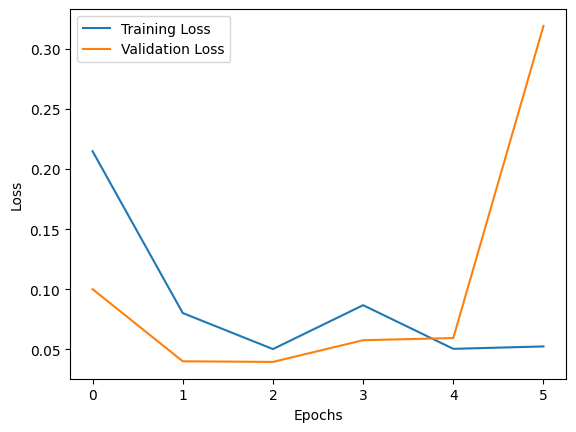

In [25]:
print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#LSTM

Epoch 1/10
224/224 [==============================] - 90s 386ms/step - loss: 0.3475 - accuracy: 0.8547 - val_loss: 0.1471 - val_accuracy: 0.9585
Epoch 2/10
224/224 [==============================] - 84s 374ms/step - loss: 0.1105 - accuracy: 0.9697 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 3/10
224/224 [==============================] - 85s 380ms/step - loss: 0.0816 - accuracy: 0.9786 - val_loss: 0.0663 - val_accuracy: 0.9811
Epoch 4/10
224/224 [==============================] - 89s 396ms/step - loss: 0.0748 - accuracy: 0.9794 - val_loss: 0.0584 - val_accuracy: 0.9811
Epoch 5/10
224/224 [==============================] - 88s 393ms/step - loss: 0.0677 - accuracy: 0.9814 - val_loss: 0.0541 - val_accuracy: 0.9836
Epoch 6/10
224/224 [==============================] - 85s 379ms/step - loss: 0.0575 - accuracy: 0.9849 - val_loss: 0.0458 - val_accuracy: 0.9912
Epoch 7/10
224/224 [==============================] - 86s 382ms/step - loss: 0.0336 - accuracy: 0.9931 - val_loss: 0.0203 - val_ac

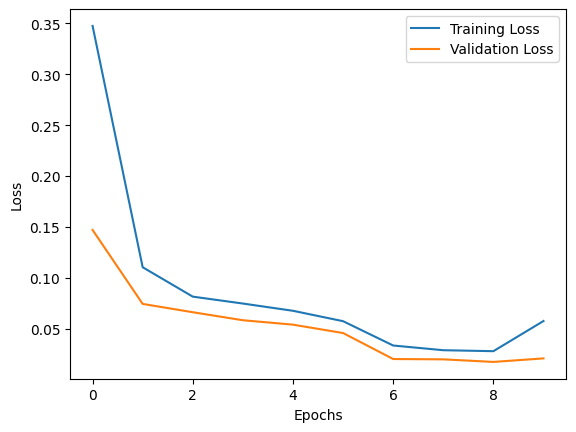

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create an LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Bi-LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a Bi-LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
 83/224 [==========>...................] - ETA: 1:42 - loss: 0.5541 - accuracy: 0.7086

#GRU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a GRU model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Bi-GRU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a Bidirectional GRU (Bi-GRU) model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(Bidirectional(GRU(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#NN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#dataset
labels = dataset['Label']

# Tokenize the URLs and convert them to sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Domain'])
sequences = tokenizer.texts_to_sequences(dataset['Domain'])

# Pad sequences to ensure they have the same length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Build a 1D CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed, stratify=y_train)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

print('--------------Validation-----------------')
# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = np.round(y_pred_val).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_val, y_pred_val, digits = 4)
print(report)

print('--------------Testing-----------------')
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (you can adjust the threshold)

# Generate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print(report)

# Plot training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()